## Assignment 4

Names:

1. Prateek Majumder
2. Neha Roy Choudhury
3. Anshuman Jha
4. Divyakumar Sanghvi
5. Rahul Govind Kumar
6. Piyush Borse
7. Ayush Chakraborty


###**Importing Libraries**

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, accuracy_score, confusion_matrix, average_precision_score
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

###**Data loading and preprocessing**

In [91]:
data = pd.read_csv('/content/loan_sanction_train.csv')

In [92]:
data.drop(columns = ["Loan_ID"], inplace = True)

In [93]:
data.isnull().sum()


,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [94]:
data.dropna(inplace=True) # Dropping rows with any null values
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [96]:
data.drop_duplicates(inplace=True)

In [97]:
data.shape

(480, 12)

###**Categoric to Numeric encoding using label encoder**

In [98]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over each column in the DataFrame
for col in data.columns:
    # Check if the column's data type is 'object' (categorical)
    if data[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        data[col] = le.fit_transform(data[col])

In [99]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [100]:
data["Loan_Status"].value_counts()

,count
Loan_Status,
1,332
0,148


***The dataset exhibits class imbalance.  The number of loans granted significantly outweighs the number of loans not granted.***

In [101]:
data.head().T

,1,2,3,4,5
Gender,1.0,1.0,1.0,1.0,1.0
Married,1.0,1.0,1.0,0.0,1.0
Dependents,1.0,0.0,0.0,0.0,2.0
Education,0.0,0.0,1.0,0.0,0.0
Self_Employed,0.0,1.0,0.0,0.0,1.0
ApplicantIncome,4583.0,3000.0,2583.0,6000.0,5417.0
CoapplicantIncome,1508.0,0.0,2358.0,0.0,4196.0
LoanAmount,128.0,66.0,120.0,141.0,267.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0


In [102]:
#0 if unfavourable
#1 if favourable
fav=1
unfav=int(not fav)

###**Protected features and PII data**

In [103]:
a = f'Gender_{unfav}.0'  # Female
b = f'Gender_{fav}.0'  # Male

c = f'Married_{unfav}.0'  # Unmarried
d = f'Married_{fav}.0'  # Married

e = f'Education_{unfav}.0'  # Lower Education
f = f'Education_{fav}.0'  # Higher Education

g = f'Self_Employed_{unfav}.0'  # Not Self-Employed
h = f'Self_Employed_{fav}.0'  # Self-Employed

i = f'Credit_History_{unfav}.0'  # No Credit History
j = f'Credit_History_{fav}.0'  # Has Credit History

k = f'Property_Area_{unfav}.0'  # Rural
l = f'Property_Area_1.0'  # Semiurban
m = f'Property_Area_{fav}.0'  # Urban

# Selecting a protected feature
choice = 'Gender'
pval = 1  # Privileged
upval = int(not pval)  # Unprivileged

# List of protected features based on dataset
protected_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

In [104]:
label_names = ['Loan_Status']
protected_attribute_names = [choice]
privileged_groups = [{choice: pval}]
unprivileged_groups = [{choice: upval}]

###**Heatmap to assess impact of different protected features**

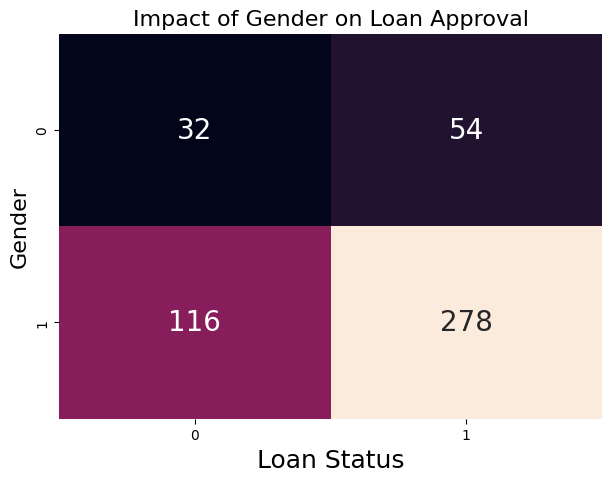

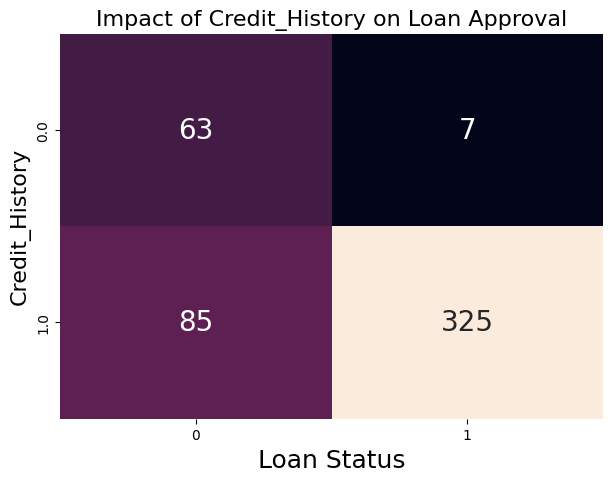

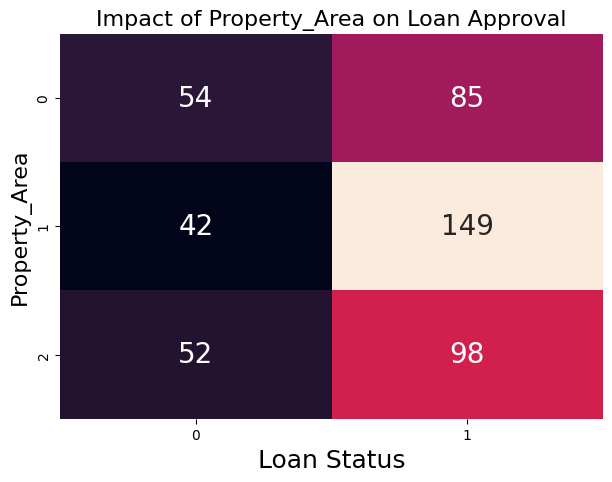

In [105]:
# List of protected features to visualize
protected_features = ['Gender', 'Credit_History', 'Property_Area']

for choice in protected_features:
    plt.figure(figsize=(7,5))  # Set figure size for each plot

    # Creating a crosstab using the selected protected feature
    plotdf = pd.crosstab(data[choice], data['Loan_Status'], rownames=[choice])

    # Creating the heatmap
    ax = sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, annot_kws={'size': 20})

    plt.xlabel('Loan Status', fontsize=18)
    plt.ylabel(choice, fontsize=16)  # Dynamically setting label based on choice
    plt.title(f'Impact of {choice} on Loan Approval', fontsize=16)

    plt.show()

###**Selecting Gender as the protected feature for reweighting**

In [106]:
choice = 'Gender'
target_feature = 'Loan_Status'
pval = 1
upval = int(not pval)

###**Function for Re-weighting**

In [107]:
def Reweighing1 (data, choice, target_feature, pval, upval, fav=1, unfav=0):


    dummy = np.repeat(1, len(data))
    data['dummy'] = dummy

    n = np.sum(data['dummy']) #Total number of instances
    sa = np.sum(data['dummy'][data[choice]==pval]) #Total number of privileged
    sd = np.sum(data['dummy'][data[choice]==upval]) #Total number of unprivileged
    ypos = np.sum(data['dummy'][data[target_feature]==fav]) #Total number of favourable
    yneg = np.sum(data['dummy'][data[target_feature]==unfav]) #Total number of unfavourable

    data_sa_ypos = data[(data[choice]==pval) & (data[target_feature]==fav)] # priviliged and favourable
    data_sa_yneg = data[(data[choice]==pval) & (data[target_feature]==unfav)] # priviliged and unfavourable
    data_sd_ypos = data[(data[choice]==upval) & (data[target_feature]==fav)] # unpriviliged and favourable
    data_sd_yneg = data[(data[choice]==upval) & (data[target_feature]==unfav)] # unpriviliged and unfavourable

    sa_ypos = np.sum(data_sa_ypos['dummy']) #Total number of privileged and favourable
    sa_yneg = np.sum(data_sa_yneg['dummy']) #Total number of privileged and unfavourable
    sd_ypos = np.sum(data_sd_ypos['dummy']) #Total number of unprivileged and favourable
    sd_yneg = np.sum(data_sd_yneg['dummy']) #Total number of unprivileged and unfavourable

    w_sa_ypos= (ypos*sa) / (n*sa_ypos) #weight for privileged and favourable
    w_sa_yneg = (yneg*sa) / (n*sa_yneg) #weight for privileged and unfavourable
    w_sd_ypos = (ypos*sd) / (n*sd_ypos) #weight for unprivileged and favourable
    w_sd_yneg = (yneg*sd) / (n*sd_yneg) #weight for unprivileged and unfavourable

    datatest=data #.copy()

    print (w_sa_ypos, w_sa_yneg, w_sd_ypos, w_sd_yneg)

    DiscriminationBefore=(sa_ypos/sa)-(sd_ypos/sd)
    DiscriminationAfter=(sa_ypos/sa * w_sa_ypos)-(sd_ypos/sd * w_sd_ypos)


    print (DiscriminationBefore, DiscriminationAfter)

    datatest['NewWeights']= np.repeat(999, len(datatest))
    datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==fav), 'NewWeights'] = w_sa_ypos
    datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==unfav), 'NewWeights'] = w_sa_yneg
    datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==fav), 'NewWeights'] = w_sd_ypos
    datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==unfav), 'NewWeights'] = w_sd_yneg

    return datatest['NewWeights']

###**Impact of chosen feature on the target variable**

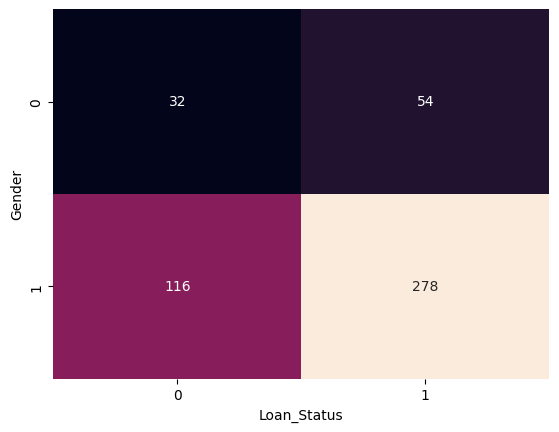

In [108]:
plotdf=pd.crosstab(data[choice], data['Loan_Status'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False)    #axes.plot(vc)
plt.show()

In [109]:
target_feature='Loan_Status'

In [110]:
dummy = np.repeat(1, len(data))
data['dummy'] = dummy
n = np.sum(data['dummy']) #Total number of instances

In [111]:
fav

1

###**Calculation of number of advantageous, disadvantageous, favourable, unfavourable, privileged, unprivileged data points along with their combinations**

In [112]:
sa = np.sum(data['dummy'][data[choice]==pval]) #Total number of privileged
sd = np.sum(data['dummy'][data[choice]==upval]) #Total number of unprivileged
ypos = np.sum(data['dummy'][data[target_feature]==fav]) #Total number of favourable
yneg = np.sum(data['dummy'][data[target_feature]==unfav]) #Total number of unfavourable

print("Total Advantegous: {}, Total Disdvantegous: {}, Total Favourable: {}, Total Unavourable: {}"
      .format(sa, sd, ypos, yneg))

Total Advantegous: 394, Total Disdvantegous: 86, Total Favourable: 332, Total Unavourable: 148


In [113]:
data_sa_ypos = data[(data[choice]==pval) & (data[target_feature]==fav)] # priviliged and favourable
data_sa_yneg = data[(data[choice]==pval) & (data[target_feature]==unfav)] # priviliged and unfavourable
data_sd_ypos = data[(data[choice]==upval) & (data[target_feature]==fav)] # unpriviliged and favourable
data_sd_yneg = data[(data[choice]==upval) & (data[target_feature]==unfav)] # unpriviliged and unfavourable

In [114]:
sa_ypos = np.sum(data_sa_ypos['dummy']) #Total number of privileged and favourable
sa_yneg = np.sum(data_sa_yneg['dummy']) #Total number of privileged and unfavourable
sd_ypos = np.sum(data_sd_ypos['dummy']) #Total number of unprivileged and favourable
sd_yneg = np.sum(data_sd_yneg['dummy']) #Total number of unprivileged and unfavourable

print("Total number of the Advantaged and Favourable Group: {}".format(sa_ypos))
print("Total number of Advantaged and Unfavourable Group: {}".format(sa_yneg))
print("Total number of Disadvantaged and Favourable Group: {}".format(sd_ypos))
print("Total number of Disadvantaged and Unfavourable Group: {}".format(sd_yneg))


Total number of the Advantaged and Favourable Group: 278
Total number of Advantaged and Unfavourable Group: 116
Total number of Disadvantaged and Favourable Group: 54
Total number of Disadvantaged and Unfavourable Group: 32


In [115]:
w_sa_ypos= (ypos*sa) / (n*sa_ypos) #weight for privileged and favourable
w_sa_yneg = (yneg*sa) / (n*sa_yneg) #weight for privileged and unfavourable
w_sd_ypos = (ypos*sd) / (n*sd_ypos) #weight for unprivileged and favourable
w_sd_yneg = (yneg*sd) / (n*sd_yneg) #weight for unprivileged and unfavourable

print("Weights for the Advantaged and Favourable Group: {}".format(w_sa_ypos))
print("Weights for the Advantaged and Unfavourable Group: {}".format(w_sa_yneg))
print("Weights for the Disadvantaged and Favourable Group: {}".format(w_sd_ypos))
print("Weights for the Disadvantaged and Unfavourable Group: {}".format(w_sd_yneg))

Weights for the Advantaged and Favourable Group: 0.9802757793764988
Weights for the Advantaged and Unfavourable Group: 1.0472701149425288
Weights for the Disadvantaged and Favourable Group: 1.1015432098765432
Weights for the Disadvantaged and Unfavourable Group: 0.8286458333333333


In [116]:
datatest=data #.copy()

DiscriminationBefore=(sa_ypos/sa)-(sd_ypos/sd)
DiscriminationAfter=(sa_ypos/sa * w_sa_ypos)-(sd_ypos/sd * w_sd_ypos)

print("Discrimination Before: {}, Discrimination After: {}".format(abs(DiscriminationBefore),                                                                         abs(DiscriminationAfter)))

Discrimination Before: 0.07767677960099162, Discrimination After: 0.0


In [117]:
datatest['Weights']= np.repeat(999, len(datatest))
datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==fav), 'Weights'] = w_sa_ypos
datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==unfav), 'Weights'] = w_sa_yneg
datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==fav), 'Weights'] = w_sd_ypos
datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==unfav), 'Weights'] = w_sd_yneg
datatest['Weights'].head()

<ipython-input-117-58a3cb43e821>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9802757793764988' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==fav), 'Weights'] = w_sa_ypos


,Weights
1,1.047270
2,0.980276
3,0.980276
4,0.980276
5,0.980276


***Discrimination has significantly reduced, to 0 after reweighting. Hence, bias has been mitigated.***




In [118]:
datatest.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,dummy,Weights
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1.047270
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1,0.980276
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1,0.980276
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1,0.980276
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,1,0.980276


In [119]:
x=datatest.drop(columns=['dummy','Loan_Status'])
y=datatest['Loan_Status']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6666)

In [121]:
X_train_weights=X_train['Weights']
X_test_weights=X_test['Weights']

X_train1=X_train.drop(columns=["Weights"])
X_test1=X_test.drop(columns=["Weights"])

###**Model without weights**

In [122]:
# Initializing and training the model without weights
clf_rf_no_weights = RandomForestClassifier(random_state=0, n_estimators=100)
clf_rf_no_weights.fit(X_train1, y_train)

# Predictions
y_pred_rf_no_weights = clf_rf_no_weights.predict(X_test1)

# Accuracy
acc_rf_no_weights = accuracy_score(y_test, y_pred_rf_no_weights)
print(f"Accuracy (Without Weights): {acc_rf_no_weights:.8f}")

Accuracy (Without Weights): 0.78472222


###**Model with weights**

In [123]:

X_train_weighted = X_train1.values * X_train_weights.values[:, np.newaxis]
X_test_weighted = X_test1.values * X_test_weights.values[:, np.newaxis]

# Initializing and training the model with weights
clf_rf_weights = RandomForestClassifier(random_state=0, n_estimators=100)
clf_rf_weights.fit(X_train_weighted, y_train, sample_weight=X_train_weights)

# Predictions
y_pred_rf_weights = clf_rf_weights.predict(X_test1)

# Accuracy
acc_rf_weights = accuracy_score(y_test, y_pred_rf_weights)
print(f"Accuracy (With Weights): {acc_rf_weights:.8f}")

Accuracy (With Weights): 0.72916667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


###**Evaluation and comparison of other metrics**

In [124]:
# Function to calculate metrics
def evaluate_model(y_true, y_pred, y_pred_prob):
    auc = roc_auc_score(y_true, y_pred_prob)  # AUC
    gini = 2 * auc - 1  # Gini
    avg_precision = average_precision_score(y_true, y_pred_prob)  # Avg Precision Score
    precision, sensitivity, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')  # Precision, Sensitivity, F1 Score
    cm = confusion_matrix(y_true, y_pred)
    fnr = cm[1, 0] / (cm[1, 0] + cm[1, 1])  # False Negative Rate

    # Assuming costs:
    cost_fp = 5000  # Cost per False Positive
    cost_fn = 10000  # Cost per False Negative
    total_cost = cm[0, 1] * cost_fp + cm[1, 0] * cost_fn
    total_cost_mn = total_cost / 1e6  # Convert to million

    return {
        "AUC": auc,
        "Gini": gini,
        "Avg Precision Score": avg_precision,
        "Precision": precision,
        "Sensitivity (Recall)": sensitivity,
        "False Negative Rate": fnr,
        "F1 Score": f1,
        "Total Cost": total_cost,
        "Total Cost (in Mn)": total_cost_mn
    }



In [125]:
# Predictions without weights
y_pred_prob_rf_no_weights = clf_rf_no_weights.predict_proba(X_test1)[:, 1]

# Evaluate the model without weights
metrics_no_weights = evaluate_model(y_test, y_pred_rf_no_weights, y_pred_prob_rf_no_weights)

# Print the metrics
for metric, value in metrics_no_weights.items():
    print(f"{metric}: {value:.8f}" if isinstance(value, float) else f"{metric}: {value}")


AUC: 0.76574074
Gini: 0.53148148
Avg Precision Score: 0.81314028
Precision: 0.76106195
Sensitivity (Recall): 0.95555556
False Negative Rate: 0.04444444
F1 Score: 0.84729064
Total Cost: 175000
Total Cost (in Mn): 0.17500000


In [126]:


# Predictions with weights
y_pred_prob_rf_weights = clf_rf_weights.predict_proba(X_test1)[:, 1]

# Evaluate the model with weights
metrics_weights = evaluate_model(y_test, y_pred_rf_weights, y_pred_prob_rf_weights)

# Print the metrics
for metric, value in metrics_weights.items():
    print(f"{metric}: {value:.8f}" if isinstance(value, float) else f"{metric}: {value}")


AUC: 0.77901235
Gini: 0.55802469
Avg Precision Score: 0.80108057
Precision: 0.70078740
Sensitivity (Recall): 0.98888889
False Negative Rate: 0.01111111
F1 Score: 0.82027650
Total Cost: 200000
Total Cost (in Mn): 0.20000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [127]:
# Create a DataFrame from the dictionaries
metrics_df = pd.DataFrame([metrics_no_weights, metrics_weights], index=['No Weights', 'With Weights'])

# Display the DataFrame
metrics_df


,AUC,Gini,Avg Precision Score,Precision,Sensitivity (Recall),False Negative Rate,F1 Score,Total Cost,Total Cost (in Mn)
No Weights,0.765741,0.531481,0.813140,0.761062,0.955556,0.044444,0.847291,175000,0.175
With Weights,0.779012,0.558025,0.801081,0.700787,0.988889,0.011111,0.820276,200000,0.200


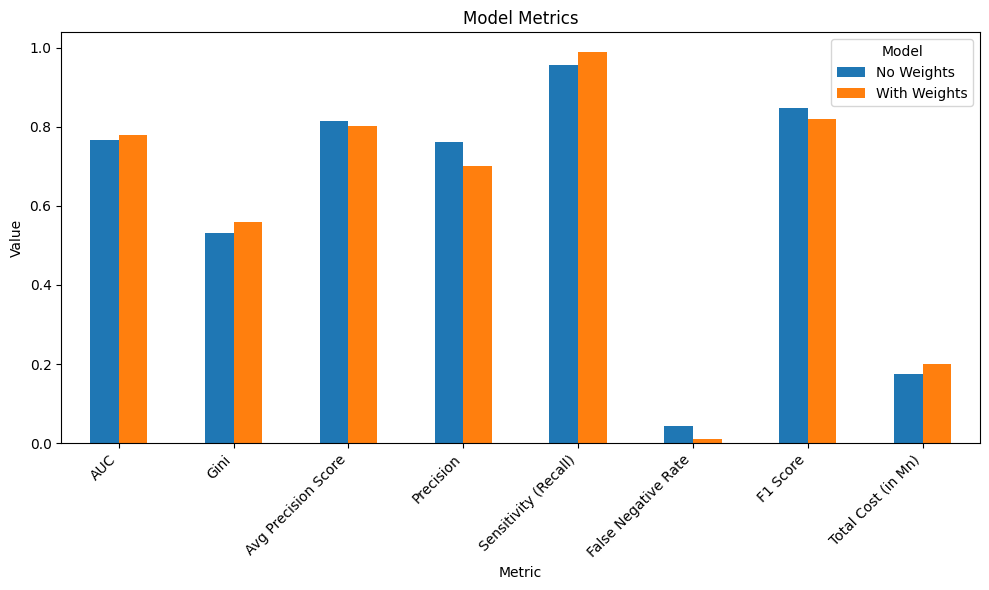

In [128]:
# Exclude the "Total Cost" column
metrics_to_plot = ['AUC', 'Gini', 'Avg Precision Score', 'Precision', 'Sensitivity (Recall)',
                   'False Negative Rate', 'F1 Score', 'Total Cost (in Mn)']

#Transpose to make plotting easier
metrics_df_transposed = metrics_df[metrics_to_plot].transpose()

# Create the bar plot
metrics_df_transposed.plot(kind='bar', figsize=(10, 6))
plt.title('Model Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Model')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


**Metrics Comparison:**

The plot summarizes key performance indicators for the model trained with and without re-weighting:

* **AUC (Area Under the ROC Curve):**  Measures the model's ability to distinguish between positive and negative classes. A higher AUC indicates better performance.  The weighted model has a slightly higher AUC (0.779 vs. 0.766), suggesting it performs marginally better in distinguishing loan approvals.

* **Gini:**  Derived from AUC, it also measures the model's discriminatory power. Similar to AUC, the weighted model shows a minor improvement.

* **Avg Precision Score:** Represents the average precision across all recall thresholds.  The unweighted model has a slightly higher score here, suggesting it might be slightly better at identifying positive cases, but the difference is marginal.

* **Precision:**  Proportion of correctly predicted positive instances out of all predicted positive instances.  The unweighted model demonstrates higher precision (0.761 vs 0.701), indicating it's less prone to false positives.

* **Sensitivity (Recall):**  Proportion of correctly predicted positive instances out of all actual positive instances. The weighted model shows much higher sensitivity (0.989 vs. 0.956), implying it's better at capturing true positive cases.  This suggests it is less likely to miss legitimate loan applications.

* **False Negative Rate:**  Proportion of incorrectly predicted negative instances out of all actual positive instances.  The weighted model has a significantly lower False Negative Rate (0.011 vs. 0.044).  This indicates it makes fewer errors in classifying a positive case as negative.

* **F1 Score:**  Harmonic mean of Precision and Recall.  A higher F1 suggests a better overall balance between precision and recall.  The unweighted model has a slightly higher F1 score.



**Key Observations:**

1. **Bias Mitigation:** The primary goal of re-weighting was to mitigate bias. While the difference is small, the higher sensitivity and lower false negative rate in the weighted model suggest a slight reduction of bias.

2. **Trade-offs:** There are trade-offs between precision and recall.  The weighted model improves recall (reducing false negatives), but lowers precision (increasing false positives).

3. **Improvements:** The improvements seen with the weighted model are marginal in several metrics, suggesting that the re-weighting may not be producing dramatic changes in model performance.  The choice to use weights or not will depend on whether prioritizing a reduced false negative rate (at the expense of precision) is a more important consideration.  The overall cost, in this context, may be less relevant given the relatively minor performance differences.

**Conclusion:**

The re-weighting strategy appears to have successfully adjusted the model's prediction towards a reduced false negative rate, hence possibly mitigating bias, although it has slightly impacted precision and cost. The choice of which model to deploy will depend on the importance placed on minimizing false negatives vs other metrics.